<a href="https://colab.research.google.com/github/jerrymart/Machine-Learning-Projects/blob/main/GML_FinalProject_Binomial_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Team Members

### Joseph Mart -A00732897

# 1. Introduction. 

### Discuss the dataset, history of it, why it is interesting, what you did with it. You must state the response variable and what kind of distribution you think it has (Poisson, binomial, normal, multinomial, etc.), the predictors and what types of variables they are (categorical,quantitative, etc.), the link function(s) you used.

In this project, we will be looking at the Telecom churn prediction dataset from kaggle https://www.kaggle.com/code/bandiatindra/telecom-churn-prediction/data

It has 21 variables which are related to customer behavior and it will help us to predict whether a particular customer will churn in favor of another telecom provider or not.

The response variable is 'Churn' which has a binomial distribution of Chrun or No Churn

Among the variables, seen below most of the features are categorical except [tenure ,MonthlyCharges,TotalCharges whic happend to be continuous while customerID-is string in structure

#2. The Model. 

### How did you decide on the predictors you did, and the model structure, etc.?
### Were any assumptions violated, and if so, how did you remediate for them? 
We carried out data cleaning and preparation, where we checked for multicolinearity among the predictors in the dataset, it was discovered that some of the features exhibit collinearity beyound a choosing threshold. The predictors found violating this assumption were removed and we obtained a more cleaner data down to 25 predictors from initial 31 predictors.

We splitted the data into training and testing set using the sklearn library. The traing were used to train the models and the testing data to validate the final model that we built

We built the first model using all the 25 predictors, and it was observed from the GLM Model output that some of the predictors used had high p_values.
Then we proceeded by using RFE method to obtain ranking for the top 14 predictors,those predictors having False in ranking were filtered out 

### Provide the model or models you made, and compare them using proper measure such as AIC, deviance, etc.
Then, we built another model with the 14 predictors and discovered that non of the 14 predictors have p_value > 0.001 in the GLM Model output making them good candidate for the model

With this latest model, we made prediction using the training data and we evaluate the model using Confusion Matrix and Accuracy Score metrics based off a cut-off point of 0.5

If the predicted probability is greater than 0.5, it will be classified as customer Churn and vice-versa

The model had an accuracy score of about 78% on the training data

We moved on further to run the model on the test data and we evaluate the accuracy and obtained about 76% accuracy which is a desired behaviour that any model should exhibit on unseen data. Accuracy on unseen data should be lesser than that of training data

### 3. Conclusions. 

### What does your model say about the dataset?

The final model was used to check the prediction the first 60 data-points on the test data to check if a customer would Churn or not on the test data. It was able to predict about 76% correctly

### What have you learned during this process? 

We learnt a procedural means of building a GLM model using Python libry after checking several sources.

We also learnt that this model can be improved upon , but to keep things simple we did not show those avdanced ways to improve on the model result and parameters

### What problems did you encounter and how did you deal with them? 

We encoutered fewer issues especially during the data preprocessing face since the data was messy and we need to properly prepare it, for instance some of the predictors have different data types that a GLM model will not be able to make use of, also we observed some of the predictors including the response variable were categorical and string in nature, we dive deeper by transforming those using get_dummy method and we further had to standardize some of the predictors that are continuous in nature

### Did you find other, potentially good models along the way?

Yes, we found out that we can advance our way forward yto make the model perform better both on the training and testing set, but we want to keep things simple since we would have limited time during this project presentation

# 4. Bibliography. 

### Cite all sources. Tell us where you got your data, what (if any) other papers you read about the data or methods you used, etc.
The data was obtained from kaggle: https://www.kaggle.com/code/bandiatindra/telecom-churn-prediction/data

### Refrences
https://www.kaggle.com/code/gauravduttakiit/explore-the-poisson-regression/notebook

https://gist.github.com/sachinsdate/d5535d5489178e6271f4c0c7a444da1e

https://jbhender.github.io/Stats506/F17/Projects/Poisson_Regression.html

https://towardsdatascience.com

https://online.stat.psu.edu/stat504/lesson/6/6.1

https://www.mygreatlearning.com/blog/generalized-linear-models/

https://timeseriesreasoning.com/contents/generalized-linear-regression-models/



# Project Steps:

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np

In [ ]:
#Read the Data into Dataframe
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn-New22.csv')

### Data Exploration Phase

In [ ]:
#Check overall datatypes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Dimensions
df.shape

(7043, 21)

There are 7043 rows and 21 columns

In [ ]:
# Checking for Missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There is no missing value

In [ ]:
# Investigate all the elements whithin each Feature 

for column in df:
    unique_values = np.unique(df[column])
    nr_values = len(unique_values)
    if nr_values <= 5:
        print("The number of unique values for feature {} is: {} -- {}".format(column, nr_values, unique_values))
    else:
        print("The number of uniques values for feature {} is: {}".format(column, nr_values))

The number of uniques values for feature customerID is: 7043
The number of unique values for feature gender is: 2 -- ['Female' 'Male']
The number of unique values for feature SeniorCitizen is: 2 -- [0 1]
The number of unique values for feature Partner is: 2 -- ['No' 'Yes']
The number of unique values for feature Dependents is: 2 -- ['No' 'Yes']
The number of uniques values for feature tenure is: 73
The number of unique values for feature PhoneService is: 2 -- ['No' 'Yes']
The number of unique values for feature MultipleLines is: 3 -- ['No' 'No phone service' 'Yes']
The number of unique values for feature InternetService is: 3 -- ['DSL' 'Fiber optic' 'No']
The number of unique values for feature OnlineSecurity is: 3 -- ['No' 'No internet service' 'Yes']
The number of unique values for feature OnlineBackup is: 3 -- ['No' 'No internet service' 'Yes']
The number of unique values for feature DeviceProtection is: 3 -- ['No' 'No internet service' 'Yes']
The number of unique values for feature

As seen most of the features are categorical except [customerID ,tenure ,MonthlyCharges,TotalCharges]

Any variable having more than 2 unique values would be created as dummy variables

# Data Preparation Phase

We will transform the non numeric Binary features and the response as follows

In [ ]:
# Creating Scale Map for Binary Categorical data and Map feature values to scale
scale_mapper = {'No':0, 'Yes':1}
df['Churn'] = df['Churn'].replace(scale_mapper)

scale_mapper2 = {'Female':0, 'Male':1}
df['gender'] = df['gender'].replace(scale_mapper2)

scale_mapper3 = {'No':0, 'Yes':1}
df['Partner'] = df['Partner'].replace(scale_mapper3)

scale_mapper4 = {'No':0, 'Yes':1}
df['Dependents'] = df['Dependents'].replace(scale_mapper4)

scale_mapper5 = {'No':0, 'Yes':1}
df['PhoneService'] = df['PhoneService'].replace(scale_mapper5)

scale_mapper5 = {'No':0, 'Yes':1}
df['PaperlessBilling'] = df['PaperlessBilling'].replace(scale_mapper5)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Creating Dummy Variables
Next we will make variables having more than two unique values into numeric representation

In [ ]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[['Contract', 'PaymentMethod', 'gender', 'InternetService',
                           'MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection',
                            'TechSupport','StreamingTV','StreamingMovies'
                           ]], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)

# Printing the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,0,1,0,0,0,0,0,0,0,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,0,0,0,1,0,0,0,0,0,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,0,1,0,0,0,0,0,0,0,0
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,0,0,0,1,0,1,0,0,0,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,0,0,0,0,0,0,0,0,0,0


### Drop the original variables
We will drop the variables that we created dummys for

We will aslo check the dataframe and convert the datatype of the columns to match with the others

In [ ]:
# We have created dummies for the below variables, so we can drop them
df = df.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService',
                        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                        'StreamingTV', 'StreamingMovies'], axis=1)

In [ ]:
# The varaible was imported as a string we need to convert it to float
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors="coerce")

## Checking outliers in Predictors

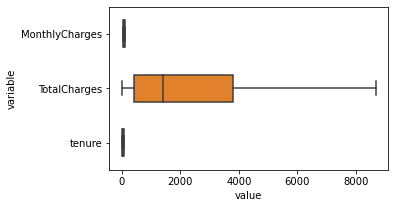

In [ ]:
#Checking Predictors for outliers in continuous features
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,3))

d = pd.DataFrame(data=df, columns=['MonthlyCharges','TotalCharges','tenure'])

sns.boxplot(y="variable", x="value", data=pd.melt(d), width= 0.5)
plt.show()

There are no outliers in the continuos features

## Standardize the Data

Since all the continuos data are in differnet scales, we need to unify them in scale using the SkLearn MinMaxScaler libry

In [ ]:
# Scaling our columns
from sklearn.preprocessing import MinMaxScaler

scale_vars = ['MonthlyCharges','TotalCharges','tenure']
scaler = MinMaxScaler()
df[scale_vars] = scaler.fit_transform(df[scale_vars]) #new_raw_data[scale_vars] -> making the np.aaary new_raw_data a dataframe
df.head(3)

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,0,1,0,0.013889,0,1,0.115423,0.003437,0,...,0,1,0,0,0,0,0,0,0,0
1,5575-GNVDE,0,0,0,0.472222,1,0,0.385075,0.217564,0,...,0,0,0,1,0,0,0,0,0,0
2,3668-QPYBK,0,0,0,0.027778,1,1,0.354229,0.012453,1,...,0,1,0,0,0,0,0,0,0,0


### Investigating Multicolinearity

We need to investigate and remove features that are highly colinear with each other

We can check this with correlation matrix plot

In [ ]:
plt.figure(figsize=(10,8)) #Set figure size
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
SeniorCitizen,1.000000,0.016479,-0.211185,0.016567,0.008576,0.156530,0.220173,0.103006,0.150889,-0.046262,-0.117000,-0.024135,0.171718,-0.153477,0.255338,-0.182742,-0.008576,0.142948,-0.182742,-0.038653,-0.182742,0.066572,-0.182742,0.059428,-0.182742,-0.060625,-0.182742,0.105378,-0.182742,0.120176
Partner,0.016479,1.000000,0.452676,0.379697,0.017706,-0.014877,0.096848,0.317504,-0.150448,0.082783,0.248091,0.082029,-0.083852,-0.095125,0.000304,0.000615,-0.017706,0.142057,0.000615,0.143106,0.000615,0.141498,0.000615,0.153786,0.000615,0.119999,0.000615,0.124666,0.000615,0.117412
Dependents,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.111377,-0.113890,0.062078,-0.164221,0.068368,0.204613,0.060267,-0.150642,0.059071,-0.165818,0.139812,0.001762,-0.024526,0.139812,0.080972,0.139812,0.023671,0.139812,0.013963,0.139812,0.063268,0.139812,-0.016558,0.139812,-0.039741
tenure,0.016567,0.379697,0.159712,1.000000,0.008448,0.006152,0.247900,0.826178,-0.352229,0.202570,0.558533,0.233006,-0.208363,-0.233852,0.019720,-0.039062,-0.008448,0.331941,-0.039062,0.327203,-0.039062,0.360277,-0.039062,0.360653,-0.039062,0.324221,-0.039062,0.279756,-0.039062,0.286111
PhoneService,0.008576,0.017706,-0.001762,0.008448,1.000000,0.016505,0.247398,0.113214,0.011942,-0.002791,0.003519,-0.007721,0.003062,-0.003319,0.289999,0.172209,-1.000000,0.279690,0.172209,-0.092893,0.172209,-0.052312,0.172209,-0.071227,0.172209,-0.096340,0.172209,-0.022574,0.172209,-0.032959
PaperlessBilling,0.156530,-0.014877,-0.111377,0.006152,0.016505,1.000000,0.352150,0.158574,0.191825,-0.051391,-0.147889,-0.013589,0.208865,-0.205398,0.326853,-0.321013,-0.016505,0.163530,-0.321013,-0.003636,-0.321013,0.126735,-0.321013,0.103797,-0.321013,0.037880,-0.321013,0.223841,-0.321013,0.211716
MonthlyCharges,0.220173,0.096848,-0.113890,0.247900,0.247398,0.352150,1.000000,0.651174,0.193356,0.004904,-0.074681,0.030550,0.271625,-0.377437,0.787066,-0.763557,-0.247398,0.490434,-0.763557,0.296594,-0.763557,0.441780,-0.763557,0.482692,-0.763557,0.338304,-0.763557,0.629603,-0.763557,0.627429
TotalCharges,0.103006,0.317504,0.062078,0.826178,0.113214,0.158574,0.651174,1.000000,-0.198324,0.170814,0.354481,0.182915,-0.059246,-0.295758,0.361655,-0.375223,-0.113214,0.468504,-0.375223,0.411651,-0.375223,0.509226,-0.375223,0.521983,-0.375223,0.431883,-0.375223,0.514973,-0.375223,0.520122
Churn,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.191825,0.193356,-0.198324,1.000000,-0.177820,-0.302253,-0.134302,0.301919,-0.091683,0.308020,-0.227890,-0.011942,0.040102,-0.227890,-0.171226,-0.227890,-0.082255,-0.227890,-0.066160,-0.227890,-0.164674,-0.227890,0.063228,-0.227890,0.061382
Contract_One year,-0.046262,0.082783,0.068368,0.202570,-0.002791,-0.051391,0.004904,0.170814,-0.177820,1.000000,-0.289510,0.067589,-0.109130,-0.000116,-0.076324,0.038004,0.002791,-0.003794,0.038004,0.100162,0.038004,0.083722,0.038004,0.102495,0.038004,0.095775,0.038004,0.061612,0.038004,0.064926


<Figure size 720x576 with 0 Axes>

As seen in corr matrix above, some of the preictors are colinear which will adversely affect our model later on
Instead of manually filtering out the collinear predictors, we will automate this by using the code shell below

In [ ]:
#Check collinear features above 0.7 threshold
dfcor = df.drop(columns=['Churn'])

correlatedColumns = []
corr = dfcor.corr()
indices = corr.index
columns = corr.columns
posthreshold = 0.75
negthreshold = -0.75

for c in columns:
    for r in indices:
        if c != r and (corr[c][r] > posthreshold or corr[c][r] < negthreshold):
            correlatedColumns.append({"column" : c , "row" : r , "val" :corr[c][r] })
            
if len(correlatedColumns) < 1: print('No Multicolinearity found in dataset')

else: print(correlatedColumns)

[{'column': 'tenure', 'row': 'TotalCharges', 'val': 0.8261783979502412}, {'column': 'PhoneService', 'row': 'MultipleLines_No phone service', 'val': -1.0}, {'column': 'MonthlyCharges', 'row': 'InternetService_Fiber optic', 'val': 0.7870655284726787}, {'column': 'MonthlyCharges', 'row': 'InternetService_No', 'val': -0.7635565582866205}, {'column': 'MonthlyCharges', 'row': 'OnlineSecurity_No internet service', 'val': -0.7635565582866205}, {'column': 'MonthlyCharges', 'row': 'OnlineBackup_No internet service', 'val': -0.7635565582866205}, {'column': 'MonthlyCharges', 'row': 'DeviceProtection_No internet service', 'val': -0.7635565582866205}, {'column': 'MonthlyCharges', 'row': 'TechSupport_No internet service', 'val': -0.7635565582866205}, {'column': 'MonthlyCharges', 'row': 'StreamingTV_No internet service', 'val': -0.7635565582866205}, {'column': 'MonthlyCharges', 'row': 'StreamingMovies_No internet service', 'val': -0.7635565582866205}, {'column': 'TotalCharges', 'row': 'tenure', 'val':

We can see in above above result, the predictors pair that are collinear above 0.75

We will need to remove those pairs by using the code in the next cell

In [ ]:
# Get correlation matrix 
corr = df.corr()

# Create a mask for values above 90% 
# But also below 100% since it variables correlated with the same one
mask = (df.corr() > 0.75) & (df.corr() < 1.0)
high_corr = corr[mask]

# Create a new column mask using any() and ~
col_to_filter_out = ~high_corr[mask].any()

# Apply new mask
df = df[high_corr.columns[col_to_filter_out]]

# Visualize cleaned dataset
df.head(2)

,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,0,1,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
df.shape

(7043, 30)

Now, we are down to 25 predictors from 30 predictors we initially had

# Splitting the Data

Before building the model, we need to split the data into train and test data. Then we will build the model using train data and evaluate the model on test data.

We will use the test_train_split sklearn libray to split the data. 

We have to divide the dataset into X and y dataframes first

In [ ]:
# Importing libraries to split the data
from sklearn.model_selection import train_test_split

X = df.drop(columns= ['Churn'], axis=1)    # Input features (attributes)
y = df['Churn']                            # Target vector

print('X shape: {}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size=0.3, random_state=100)

X shape: (7043, 25)
y shape: (7043,)


### Inspect the distribution of the response

<AxesSubplot:xlabel='Churn', ylabel='count'>

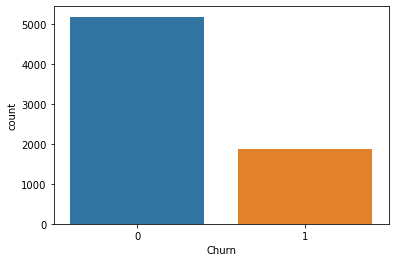

In [ ]:
import seaborn as sns

sns.countplot(data=df,x='Churn')

The Response is not balanced, only about 1/3 of the response category are classified as 'Churn'

We will expect that our models will be predicting more of the No Churn correctly since this has the largest count of the reponse category

# GLM Model Building Phase

### Model1 using Trainng Data

In [ ]:
# Importing libraries
import statsmodels.api as sm

# Logistic reg model
model1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())

model1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4911
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2114.8
Date:                Wed, 20 Apr 2022   Deviance:                       4229.5
Time:                        14:35:55   Pearson chi2:                 4.95e+03
No. Iterations:                   100   Pseudo R-squ. (CS):             0.2570
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.3124      0.094     -3.324      0.001      -0.497      -0.128
SeniorCitizen                             0.2678      0.098      2.731      0.006       0.076       0.460
Partner                                  -0.1662      0.089     -1.865      0.062      -0.341       0.008
Dependents                               -0.2191      0.105     -2.091      0.037      -0.424      -0.014
PhoneService                             -0.0658      0.070     -0.942      0.346      -0.203       0.071
PaperlessBilling                          0.3657      0.087      4.186      0.000       0.194       0.537
Contract_One year                        -1.2789      0.119    -10.710      0.000      -1.513      -1.045
Contract_Two year                        -2.2525      0.193    -11.680      0.000      -2.630      -1.875
PaymentMethod_Credit card (automatic)    -0.1550      0.135     -1.151      0.250      -0.419       0.109
PaymentMethod_Electronic check            0.4713      0.110      4.274      0.000       0.255       0.687
PaymentMethod_Mailed check                0.1054      0.133      0.795      0.427      -0.154       0.365
InternetService_No                       -0.2151      0.022     -9.963      0.000      -0.257      -0.173
MultipleLines_No phone service           -0.2466      0.093     -2.654      0.008      -0.429      -0.064
MultipleLines_Yes                         0.1720      0.087      1.981      0.048       0.002       0.342
OnlineSecurity_No internet service       -0.2151      0.022     -9.963      0.000      -0.257      -0.173
OnlineSecurity_Yes                       -0.5071      0.098     -5.194      0.000      -0.698      -0.316
OnlineBackup_No internet service         -0.2151      0.022     -9.963      0.000      -0.257      -0.173
OnlineBackup_Yes                         -0.4655      0.087     -5.354      0.000      -0.636      -0.295
DeviceProtection_No internet service     -0.2151      0.022     -9.963      0.000      -0.257      -0.173
DeviceProtection_Yes                     -0.1213      0.091     -1.332      0.183      -0.300       0.057
TechSupport_No internet service          -0.2151      0.022     -9.963      0.000      -0.257      -0.173
TechSupport_Yes                          -0.6377      0.100     -6.347      0.000      -0.835      -0.441
StreamingTV_No internet service          -0.2151      0.022     -9.963      0.000      -0.257      -0.173
StreamingTV_Yes                           0.2217      0.092      2.408      0.016       0.041       0.402
StreamingMovies_No internet service      -0.2151      0.022     -9.963      0.000      -0.257      -0.173
StreamingMovies_Yes                       0.1838      0.092      2.007      0.045       0.004       0.363
=========

## Using RFE For  Feature Selection 

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logmodel, 14)             # RFE with 14 variables as output
rfe = rfe.fit(X_train, y_train)

#Join the columns and the rfe ranking
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

C:\Users\realj\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=14 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


[('SeniorCitizen', False, 2),
 ('Partner', False, 7),
 ('Dependents', True, 1),
 ('PhoneService', False, 8),
 ('PaperlessBilling', True, 1),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', False, 5),
 ('PaymentMethod_Electronic check', True, 1),
 ('PaymentMethod_Mailed check', False, 11),
 ('InternetService_No', False, 3),
 ('MultipleLines_No phone service', False, 12),
 ('MultipleLines_Yes', False, 6),
 ('OnlineSecurity_No internet service', True, 1),
 ('OnlineSecurity_Yes', True, 1),
 ('OnlineBackup_No internet service', True, 1),
 ('OnlineBackup_Yes', True, 1),
 ('DeviceProtection_No internet service', True, 1),
 ('DeviceProtection_Yes', False, 10),
 ('TechSupport_No internet service', True, 1),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_No internet service', True, 1),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_No internet service', False, 4),
 ('StreamingMovies_Yes', False, 9)]

The variables showing True are the ones we are interested in using

## Build a new model using the above 14 variables
Let us build our second model using the 14 variables that we had from RFE output.

In [ ]:
column = X_train.columns[rfe.support_]

X_train_smod = sm.add_constant(X_train[column])
model2 = sm.GLM(y_train,X_train_smod, family = sm.families.Binomial())
result = model2.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4919
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2128.3
Date:                Wed, 20 Apr 2022   Deviance:                       4256.5
Time:                        14:44:36   Pearson chi2:                 4.98e+03
No. Iterations:                   100   Pseudo R-squ. (CS):             0.2529
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -0.3353      0.096     -3.476      0.001      -0.524      -0.146
Dependents                              -0.3397      0.094     -3.605      0.000      -0.524      -0.155
PaperlessBilling                         0.3977      0.086      4.606      0.000       0.228       0.567
Contract_One year                       -1.3040      0.116    -11.221      0.000      -1.532      -1.076
Contract_Two year                       -2.2873      0.187    -12.214      0.000      -2.654      -1.920
PaymentMethod_Electronic check           0.5220      0.079      6.583      0.000       0.367       0.677
OnlineSecurity_No internet service      -0.3012      0.030    -10.207      0.000      -0.359      -0.243
OnlineSecurity_Yes                      -0.5193      0.097     -5.373      0.000      -0.709      -0.330
OnlineBackup_No internet service        -0.3012      0.030    -10.207      0.000      -0.359      -0.243
OnlineBackup_Yes                        -0.4518      0.085     -5.301      0.000      -0.619      -0.285
DeviceProtection_No internet service    -0.3012      0.030    -10.207      0.000      -0.359      -0.243
TechSupport_No internet service         -0.3012      0.030    -10.207      0.000      -0.359      -0.243
TechSupport_Yes                         -0.6676      0.099     -6.760      0.000      -0.861      -0.474
StreamingTV_No internet service         -0.3012      0.030    -10.207      0.000      -0.359      -0.243
StreamingTV_Yes                          0.2831      0.084      3.374      0.001       0.119       0.448
========================================================================================================
"""

Here we are using the GLM (Generalized Linear Models) method from the statsmodels.api library. 

Binomial in the family argument tells the statsmodels that it needs to fit a logit curve to binomial data (i.e., the target variable will have only two values, in this case, ‘Churn’ and ‘Non-Churn’).

### Predicting the output probabilities
Using logistic regression curve, we will get the probabilities of churning and not churning

In [ ]:
# Prediction on the train set
y_train_pred = result.predict(X_train_smod)

#Output the prediction for 15 data point
y_train_pred[:15]

877     0.053014
5792    0.245203
5334    0.032269
878     0.090784
6578    0.040470
3090    0.585547
3043    0.642097
5028    0.044859
4463    0.642097
2822    0.089996
4206    0.019453
1247    0.080846
3493    0.515607
266     0.015849
4927    0.015849
dtype: float64

Those are predicted probabilities

We will create a dataframe with the actual churn column and the predicted probabilitiee and merge the table

In [ ]:
# Create dataframe with the actual churn vs the predicted
y_train_pred_proba = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_proba['CustomerID'] = y_train.index  #set customerID as the index

#Output fitsy y_train_pred_proba
y_train_pred_proba.head()

,Churn,Churn_Prob,CustomerID
877,0,0.053014,877
5792,1,0.245203,5792
5334,1,0.032269,5334
878,0,0.090784,878
6578,0,0.040470,6578


Logistic curve only gave us the probabilities and not the actual classification of ‘Churn’ and ‘Non-Churn,’ we will define a threshold probability that classify customers as ‘churn’ and ‘non-churn.’

Let us choose 0.5 as an arbitrary cutoff, if the probability of a particular customer churning < 0.5, we would classify it as ‘Non-Churn,’ if >0.5, we will classify it as ‘Churn.’


In [ ]:
# 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_proba['predicted'] = y_train_pred_proba.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# y_train_pred_proba
y_train_pred_proba.head()

,Churn,Churn_Prob,CustomerID,predicted
877,0,0.053014,877,0
5792,1,0.245203,5792,0
5334,1,0.032269,5334,0
878,0,0.090784,878,0
6578,0,0.040470,6578,0


We have used a cutoff of 0.5 to classify the customers as ‘Churn’ and ‘Non-churn.’, since these are the probabilities, they are bound to be errors.meaning 
‘Churn’ customers would be  misclassified as ‘Non-Churn.’
‘Non-Churn’ customers would be misclassified as ‘Churn.’

# Model Evaluation

### 1. Confusion Matrix
One of the evaluation metrics to use is Confusion Matrix

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
confusion_matrix = (metrics.confusion_matrix(y_train_pred_proba.Churn, y_train_pred_proba.predicted))
confusion_matrix

array([[3161,  466],
       [ 582,  721]], dtype=int64)

In [ ]:
# Assigning the values from our matrix
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives
TP = confusion_matrix[1,1] # true positive 


# Let's see the sensitivity
print('Sensitivity', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ', TN / float(TN+FP))

print()

print('True Positive: ',TP)
print('True Negative: ',TN)
print('Fale Positive: ',FP)
print('False Negative: ',FN)


Sensitivity 0.5533384497313891
Specificity:  0.8715191618417425

True Positive:  721
True Negative:  3161
Fale Positive:  466
False Negative:  582


### 2. Accuracy

In [ ]:
# Accuracy Check
print('Model Accuracy on training:', metrics.accuracy_score(y_train_pred_proba.Churn, y_train_pred_proba.predicted))

Model Accuracy on training: 0.7874239350912778


### Model Evaluation Using Test

Let us make predictions on the test data using this model. 

In [ ]:
column = X_train.columns[rfe.support_]
X_test_smod = sm.add_constant(X_test[column])

In [ ]:
# Prediction on the test
y_test_pred = result.predict(X_test_smod)

y_test_pred[:10]

4880    0.015849
1541    0.015849
1289    0.036335
5745    0.016779
4873    0.136887
4168    0.041946
1557    0.258423
2892    0.136887
664     0.011335
1588    0.174247
dtype: float64

In [ ]:
# Create dataframe with the actual test churn vs the predicted
y_test_pred_proba = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_proba['CustomerID'] = y_test.index  #set customerID as the index

#Output y_test_pred_proba
y_test_pred_proba.head(10)

,Churn,Churn_Prob,CustomerID
4880,0,0.015849,4880
1541,0,0.015849,1541
1289,0,0.036335,1289
5745,0,0.016779,5745
4873,0,0.136887,4873
4168,0,0.041946,4168
1557,0,0.258423,1557
2892,0,0.136887,2892
664,0,0.011335,664
1588,0,0.174247,1588


Dataframe with the actual churn test column and the predicted probabilitiee and merge the table

In [ ]:
# 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_test_pred_proba['predicted'] = y_test_pred_proba.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# y_test_pred_proba
y_test_pred_proba.head(10)

,Churn,Churn_Prob,CustomerID,predicted
4880,0,0.015849,4880,0
1541,0,0.015849,1541,0
1289,0,0.036335,1289,0
5745,0,0.016779,5745,0
4873,0,0.136887,4873,0
4168,0,0.041946,4168,0
1557,0,0.258423,1557,0
2892,0,0.136887,2892,0
664,0,0.011335,664,0
1588,0,0.174247,1588,0


#### Confusion Matrix and Accuracy Check on Test Data

In [ ]:
#Confusion matrix on test data
confusion_matrix_test = (metrics.confusion_matrix(y_test_pred_proba.Churn, y_test_pred_proba.predicted))
confusion_matrix_test

array([[1321,  226],
       [ 270,  296]], dtype=int64)

True Positive:  296

True Negative:  1321

Fale Positive:  226

False Negative:  270

In [ ]:
# Accuracy Check
print('Model Accuracy on Test Data:', metrics.accuracy_score(y_test_pred_proba.Churn, y_test_pred_proba.predicted))

Model Accuracy on Test Data: 0.7652626597255088


In [ ]:
#Check the first 60 predictions on the Test Data
y_test_pred_proba[:60]

,Churn,Churn_Prob,CustomerID,predicted
4880,0,0.015849,4880,0
1541,0,0.015849,1541,0
1289,0,0.036335,1289,0
5745,0,0.016779,5745,0
4873,0,0.136887,4873,0
4168,0,0.041946,4168,0
1557,0,0.258423,1557,0
2892,0,0.136887,2892,0
664,0,0.011335,664,0
1588,0,0.174247,1588,0
